# Analyse complète d'un problème de Data Science

### Etape 1 : 

#### Variables disponibles:
•surface_ha : Surface cultivée en hectares
•type_sol : Type de sol (argileux, sableux, limoneux)
•engrais_kg/ha : Quantité d'engrais utilisée en kg/ha
•precipitations_mm : Précipitations moyennes mensuelles en mm
•temperature_C : Température moyenne mensuelle en °C
•rendement_t/ha : Rendement obtenu en tonnes par hectare

#### Formulation du problème métier:
On souhaite prédire le rendement ( en tonnes par hectares) pour une ferme qui cultive du maïs pour cela on souhaite optimiser les ressources dont on dispose pour maximiser le rendement ( type de sol , quantité d'engrais, précipitations, température moyene et surface cultivée)

#### Identifiction de la variable cible et les variables explicatives
##### Variable cible :
- rendement_t/ha
##### Variables explicatives :
- type_sol
- engrais_kg/ha
- precipitations_mm
- temperature_C


#### Problèmatique centrale pour la ferme 
Optimiser les variables explicatives afin de maximiser le rendement.



## Étape 2 : Statistiques descriptives

### Mesures de tendance centrale
**Données** : 8.5, 5.2, 7.3, 9.1, 4.8  
**Moyenne** : (8.5 + 5.2 + 7.3 + 9.1 + 4.8) / 5 = **6.98**  
**Médiane** : 7.3  
**Mode** : Aucune valeur répétée → **Pas de mode**

### Mesures de dispersion
**Variance** 
Formule pour un échantillon :
σ2=1n∑(xi−μ)2
σ2=n1​∑(xi​−μ)2

Calcul :

    (8.5 - 6.98)² = 2.3044

    (5.2 - 6.98)² = 3.1684

    (7.3 - 6.98)² = 0.1024

    (9.1 - 6.98)² = 4.4944

    (4.8 - 6.98)² = 4.7524

σ2=2.3044+3.1684+0.1024+4.4944+4.75245=14.8225=2.9656
σ2=52.3044+3.1684+0.1024+4.4944+4.7524​=514.822​=2.9656

**Écart-type (σ)**
σ= racine carré de 2.9656≈1.722

**Étendue**
Etendue=max−min=9.1−4.8=4.3 \
Etendue=max−min=9.1−4.8=4.3

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path= './Projet_Ferme/rendement_mais.csv'
df= pd.read_csv(file_path)


df.head()


,SURFACE_HA,TYPE_SOL,ENGRAIS_KG_HA,PRECIPITATIONS_MM,TEMPERATURE_C,RENDEMENT_T_HA
0,7,Limoneux,56,124,21,10.759827
1,4,Limoneux,144,97,28,5.824879
2,8,Limoneux,157,81,21,7.842204
3,5,Argileux,123,106,17,10.560973
4,7,Sableux,88,149,20,11.905060


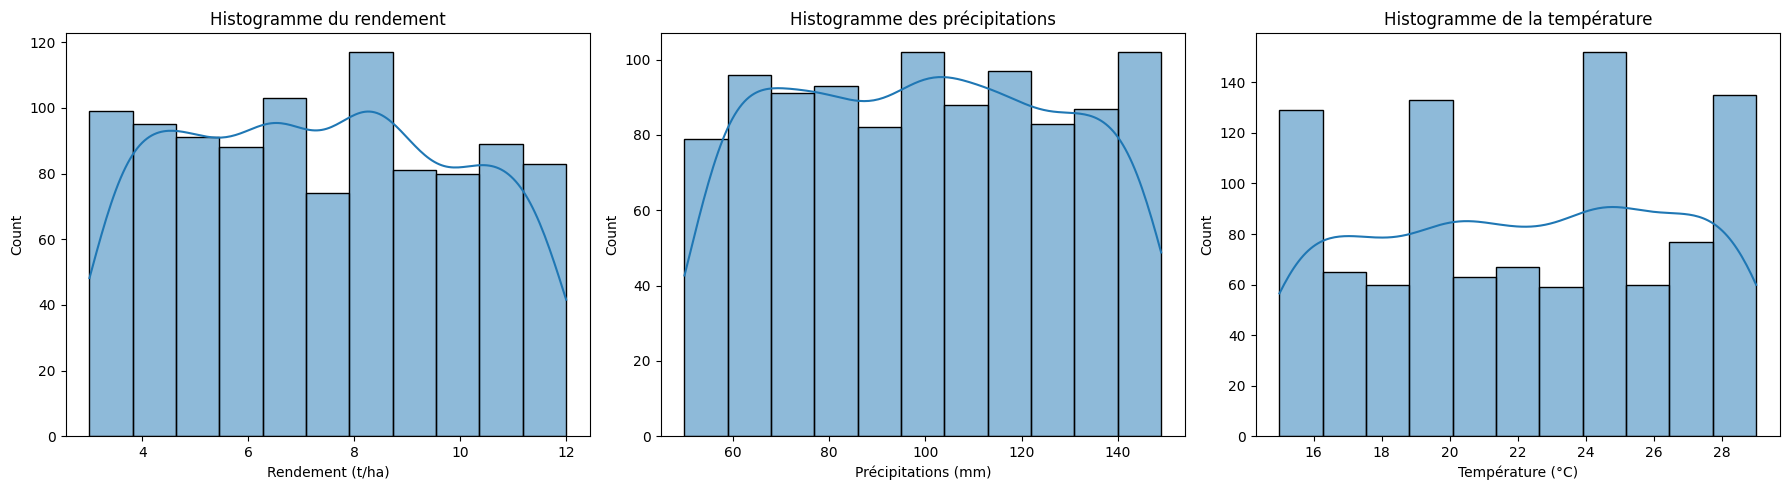

In [9]:
# Création des histogrammes
fig1, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df["RENDEMENT_T_HA"], kde=True, ax=axes[0])
axes[0].set_title("Histogramme du rendement")
axes[0].set_xlabel("Rendement (t/ha)")

sns.histplot(df["PRECIPITATIONS_MM"], kde=True, ax=axes[1])
axes[1].set_title("Histogramme des précipitations")
axes[1].set_xlabel("Précipitations (mm)")

sns.histplot(df["TEMPERATURE_C"], kde=True, ax=axes[2])
axes[2].set_title("Histogramme de la température")
axes[2].set_xlabel("Température (°C)")

plt.tight_layout()
plt.show()

#### Interpretations des résultats
##### Historgrammes
- Rendement : On observe une légère declinaison autour de 7 et 8 et une agumentation autour 8 et 9
- Précipitations : Globalement bien distribués 
- Températures : On observe une distribution avec des fluctuations périodiques.


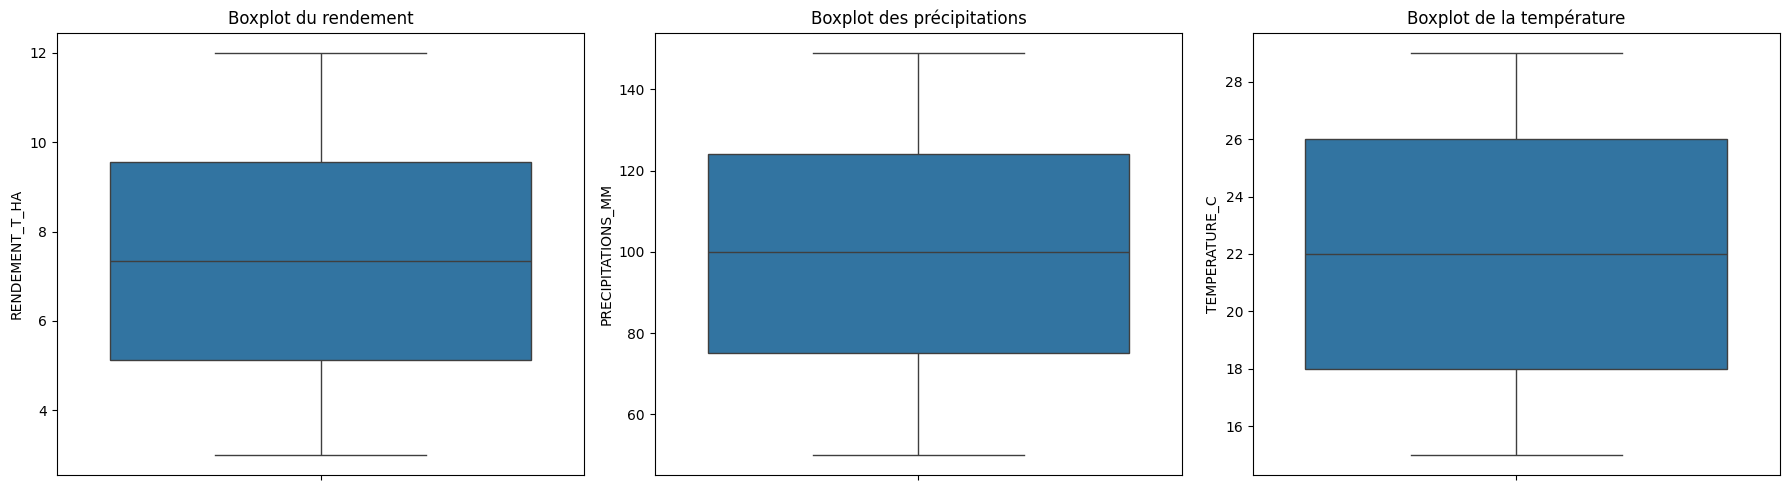

In [11]:
# Création des boxplots
fig2, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.boxplot(y=df["RENDEMENT_T_HA"], ax=axes[0])
axes[0].set_title("Boxplot du rendement")

sns.boxplot(y=df["PRECIPITATIONS_MM"], ax=axes[1])
axes[1].set_title("Boxplot des précipitations")

sns.boxplot(y=df["TEMPERATURE_C"], ax=axes[2])
axes[2].set_title("Boxplot de la température")

plt.tight_layout()
plt.show()


##### Boxplots
Distributions équilibrés , pas de valeurs abberantes


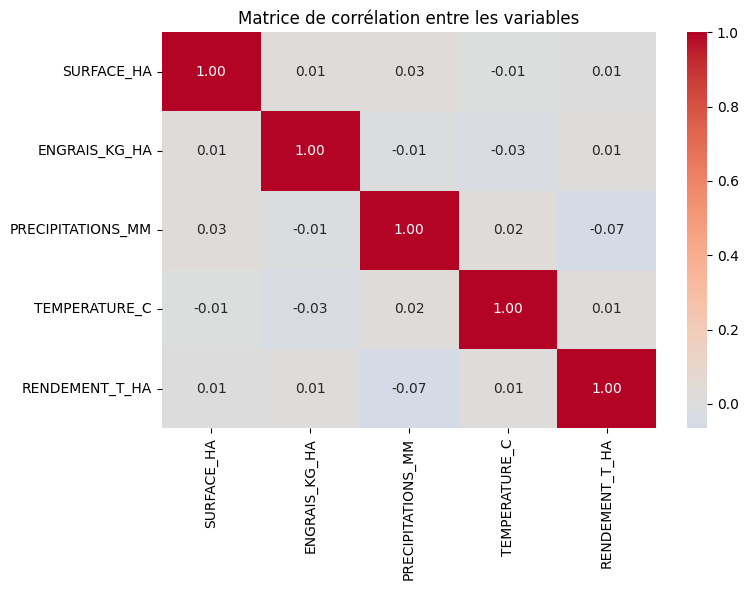

TEMPERATURE_C        0.013166
ENGRAIS_KG_HA        0.012368
SURFACE_HA           0.009141
PRECIPITATIONS_MM   -0.065479
Name: RENDEMENT_T_HA, dtype: float64

In [18]:
# Calcul de la matrice de corrélation
correlation_matrix = df.corr(numeric_only=True)

# Visualisation avec une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matrice de corrélation entre les variables")
plt.tight_layout()
plt.show()

# Tri des corrélations avec la variable 'rendement'
rendement_corr = correlation_matrix["RENDEMENT_T_HA"].drop("RENDEMENT_T_HA").sort_values(ascending=False)
rendement_corr

On voit que les variables explicatives n'ont pas de contributions significatives au rendement 

## Étape 3 : Analyse de variance (ANOVA) à la main

### Somme des carrés intra-classe (SSW)

#### Argileux
- Moyenne : 6.8  
- (9.1 - 6.8)² = 0.09  
- (6.5 - 6.8)² = 0.09  
- Total = 0.18

#### Sableux
- Moyenne : 5.0  
- (5.2 - 5.0)² = 0.04  
- (4.8 - 5.0)² = 0.04  
- Total = 0.08

#### Limoneux
- Un seul point → Variance nulle

**SSW total = 0.18 + 0.08 + 0 = 0.26**

### Degrés de liberté
- Entre groupes : 3 - 1 = 2  
- Intra-groupes : 5 - 3 = 2

### Somme des carrés entre groupes (SSB)
- SSB = 14.568  
- Moyenne entre groupes = 14.568 / 2 = 7.284  
- Moyenne intra-groupes = 0.26 / 2 = 0.13

### Statistique F
- F = 7.284 / 0.13 = 56.03

### p-value
- p ≈ 0.0135 (via table de loi)  
- p < 0.05 → significatif

> Conclusion : On rejette H0 et on conclut que le type de sol a une influence significative sur le rendement.

---

## Mesures de dispersion

- Moyenne : 6.98  
- Somme des carrés : 14.823  
- σ = √(14.823 / 5) ≈ 1.722  
- Variance = 2.9656  
- Étendue = 9.1 - 4.8 = 4.3

---

In [17]:
from scipy.stats import f_oneway
# Regroupement des rendements par type de sol
argileux = df[df["TYPE_SOL"] == "Argileux"]["RENDEMENT_T_HA"]
sableux = df[df["TYPE_SOL"] == "Sableux"]["RENDEMENT_T_HA"]
limoneux = df[df["TYPE_SOL"] == "Limoneux"]["RENDEMENT_T_HA"]

# Test ANOVA
f_stat, p_value = f_oneway(argileux, sableux, limoneux)

print(" Résultats ANOVA ")
print(f"F-statistique : {f_stat:.4f}")
print(f"P-value       : {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print(" on rejette H₀, Le type de sol n'influence pas le rendement")
else:
    print(" on ne rejette pas H₀, le type de sol influence le rendement")


 Résultats ANOVA 
F-statistique : 1.3561
P-value       : 0.2582
 on ne rejette pas H₀, le type de sol influence le rendement


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# définition des données d'entrainement 


df_onehot= pd.get_dummies(df, columns=["TYPE_SOL"], drop_first=True)

X = df_onehot.drop(columns=['RENDEMENT_T_HA'])
y = df_onehot['RENDEMENT_T_HA']

# Données entrainement & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Régression Linéaire": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Ridge": Ridge(alpha=1.0)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n {name}")
    print(f"MAE : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.2f}")


 Régression Linéaire
MAE : 2.10
RMSE : 2.46
R²   : -0.03

 Random Forest
MAE : 2.06
RMSE : 2.50
R²   : -0.06

 Ridge
MAE : 2.10
RMSE : 2.46
R²   : -0.03


Toutes les modèles ne semblent pas performer bien , le meilleur semble être random forest.
Une hypothèse qui pourrait être plausible , les données sont mal étiquettés ou bruités


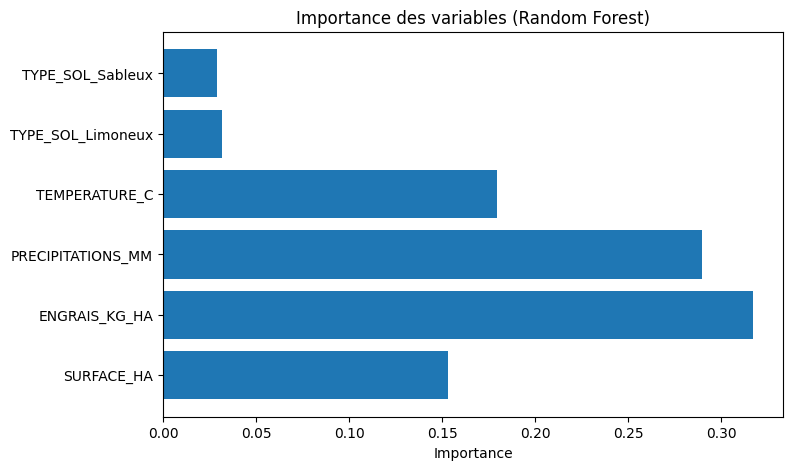

In [30]:
importances = models["Random Forest"].feature_importances_
features = X_train.columns

# Affichage
plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Importance des variables (Random Forest)")
plt.show()

### Etape 5: Interprétation et recommandations 

##### Recommandations:
On peut voir l'importance des variables pour notre analyse et on remarque que l'engrais et les précipitations sont les plus importants.
Je propose de controler les précipitations qui ont un rendement négative sur notre rendement ainsi que choisir un engrais plus performant.
On pourrait conseiller également de choisir un sol Limoneux même si la différence est minimes entre le sol limoneux et Sableux.



##### Les limites du modèles:
On peut voir que les modèles sont précis que selon la qualité des données, si il nous manque des données ou si les données sont mal recupéré les prédictions seront fausses.
De plus, On peut aussi essayer d'utiliser des modèles à noyaux qui permettent des capturer les données non linéaires ou voir des proprités sous-jacantes.
##### Les décisions que la ferme pourrait prendre pour optimiser sa production :
- Choisir le sol limoneux
- Choisir un engrais adéquat
- Controler les précipitations
